In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.sparse.csgraph import connected_components, shortest_path
from pprint import pprint
from time import time

%matplotlib inline

# I know both of the below won't work haha
# TODO: test non square dungeons
# TODO: test square densities other than 3

In [9]:
def new_coins(cr):
    coins = dict()

    if cr <= 4:
        coins['CP'] = 1800 + (2700 - 1800) * (cr - 1)/3
        coins['SP'] = 900 + (1350 - 900) * (cr - 1)/3
        coins['GP'] = 60 + (90 - 60) * (cr - 1)/3
    elif cr <= 10:
        coins['CP'] = 500 + (1000 - 500) * (cr - 5)/5
        coins['SP'] = 5000 + (10000 - 5000) * (cr - 5)/5
        coins['GP'] = 1500 + (3000 - 1500) * (cr - 5)/5
        coins['PP'] = 75 + (150 - 75) * (cr - 5)/5
    elif cr <= 16:
        coins['GP'] = 10000 + (20000 - 10000) * (cr - 11)/5
        coins['PP'] = 1250 + (2500 - 1250) * (cr - 11)/5
    else:
        coins['GP'] = 42000 
        coins['PP'] = 28000 

    return coins

def old_coins(cr):
    coins = dict()

    if cr <= 4:
        coins['CP'] = 2100 
        coins['SP'] = 1050 
        coins['GP'] = 70 
    elif cr <= 10:
        coins['CP'] = 700 
        coins['SP'] = 7000 
        coins['GP'] = 2100 
        coins['PP'] = 105 
    elif cr <= 16:
        coins['GP'] = 14000 
        coins['PP'] = 1750 
    else:
        coins['GP'] = 42000 
        coins['PP'] = 28000 

    return coins

def value_from_coins(coins):
    value = 0
    if 'CP' in coins:
        value += coins['CP']
    if 'SP' in coins:
        value += 10*coins['SP']
    if 'GP' in coins:
        value += 100*coins['GP']
    if 'PP' in coins:
        value += 1000*coins['PP']
        
    return value

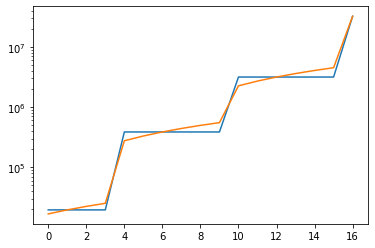

In [12]:
old_values = [value_from_coins(old_coins(i)) for i in range(1, 18)]
plt.semilogy(old_values)
new_values = [value_from_coins(new_coins(i)) for i in range(1, 18)]
plt.semilogy(new_values)
plt.show()

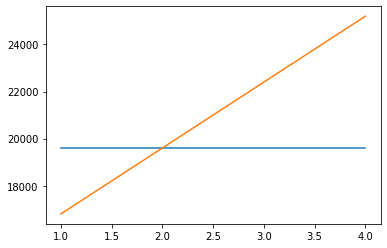

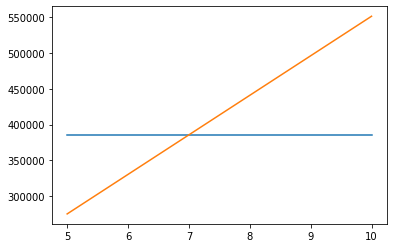

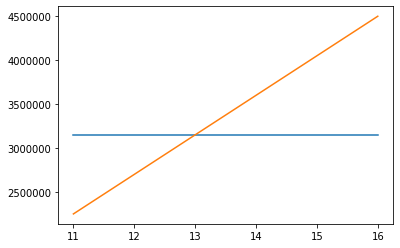

In [14]:
for a,b in [(1, 4), (5, 10), (11, 16)]:
    old_values = [value_from_coins(old_coins(i)) for i in range(a, b+1)]
    plt.plot(range(a, b+1), old_values)
    new_values = [value_from_coins(new_coins(i)) for i in range(a, b+1)]
    plt.plot(range(a, b+1), new_values)
    plt.show()